### łatwa wersja
szukane: **Prędkość początkowa**

Dane wejściowe:
- zadany zasięg d
- kąt rzutu a
- współczynnik oporu powietrza k
- masa ciała m

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


fuzzy:     6.5187163375224415
analitic:  8.735459559033128


c:\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


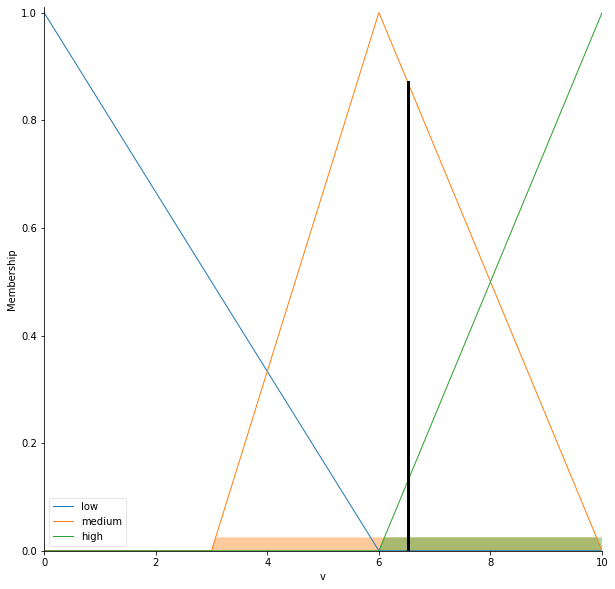

In [191]:
distance = ctrl.Antecedent(np.arange(1,11,1),'distance')
angle = ctrl.Antecedent(np.arange(10,91,5),'angle')
# drag = ctrl.Antecedent(np.arange(0.47,1.15,0.05),'drag')
# mass = ctrl.Antecedent(np.arange(1,5,0.5),'mass')

distance.automf(3)
angle.automf(3)


# distance['low'] = fuzz.trimf(distance.universe,[0,0,5])
# distance['medium'] = fuzz.trimf(distance.universe,[0,5,10])
# distance['high'] = fuzz.trimf(distance.universe,[5,10,10])

# t_angle['low'] = fuzz.trimf(t_angle.universe,[0,0,15])
# t_angle['medium'] = fuzz.trimf(t_angle.universe,[10,15,21])
# t_angle['high'] = fuzz.trimf(t_angle.universe,[15,21,21])


v = ctrl.Consequent(np.arange(0, 11, 1), 'v')
v['low'] = fuzz.trimf(v.universe,[0,0,6])
v['medium'] = fuzz.trimf(v.universe,[3,6,10])
v['high'] = fuzz.trimf(v.universe,[6,10,10])

# rule1 = ctrl.Rule(distance['low'] and t_angle['low'], v['low'])
# rule2 = ctrl.Rule(distance['low'] and t_angle['high'], v['low'])
# rule3 = ctrl.Rule(distance['high'] and t_angle['low'], v['high'])
# rule4 = ctrl.Rule(distance['medium'] and t_angle['medium'], v['medium'])

rule1 = ctrl.Rule(angle['good'],v['low'])
rule2 = ctrl.Rule(angle['average'], v['high']) # dobrze
rule3 = ctrl.Rule(distance['good'], v['high'])
rule4 = ctrl.Rule(distance['average'] and angle['average'], v['medium'])

v_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
velo = ctrl.ControlSystemSimulation(v_ctrl)

velo.input['angle'] =  11.0
velo.input['distance'] =  5.0
velo.compute()

print ("fuzzy:    ",velo.output['v'])
v.view(sim=velo)

print("analitic: ",np.sqrt((5/(np.sin(2*20*np.pi / 180.)))*9.81))

In [176]:
data = []
for d in np.arange(0,11,0.1):
    for a in np.arange(10,91,5):   
        data.append([d,a,np.sqrt((d/(np.sin(2*a*np.pi / 180.)))*9.81)])
#         print(d,a,np.sqrt((d/(np.sin(2*a*np.pi / 180.)))*9.81))
data = np.array(data)


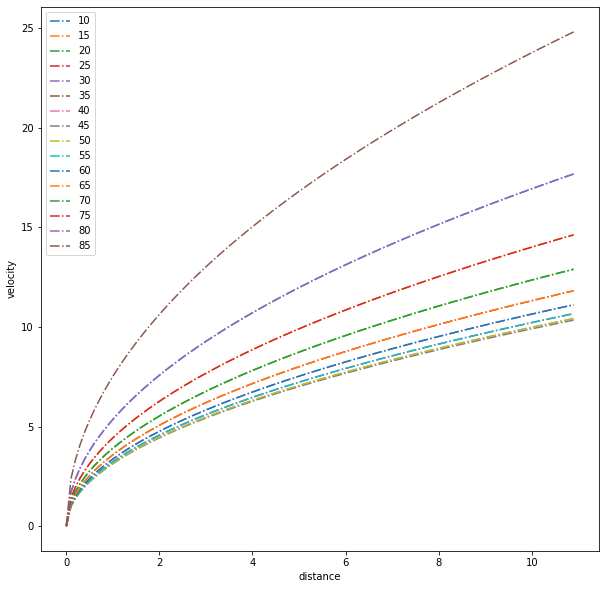

In [183]:
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('distance')
plt.ylabel('velocity')
for a in np.arange(10,86,5):
    plots = np.array([row for row in data if row[1]==a])
    plt.plot(plots[:,0],plots[:,2],'-.', label=a)
plt.legend()
    